# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/522176'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-10-04 16:33:21.084847: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-04 16:33:21.098439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 16:33:21.114311: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 16:33:21.119133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 16:33:21.131708: I tensorflow/core/platform/cpu_feature_guar

2024-10-04 16:33:23.557206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "amazon", sample_size=100_000
)

Loading train tensors:   0%|          | 0/196 [00:00<?, ?it/s]

Loading train tensors:   1%|          | 1/196 [00:00<01:18,  2.48it/s]

Loading train tensors:   1%|          | 2/196 [00:00<01:16,  2.52it/s]

Loading train tensors:   2%|▏         | 3/196 [00:01<01:15,  2.54it/s]

Loading train tensors:   2%|▏         | 4/196 [00:01<01:15,  2.55it/s]

Loading train tensors:   3%|▎         | 5/196 [00:01<01:14,  2.57it/s]

Loading train tensors:   3%|▎         | 6/196 [00:02<01:13,  2.58it/s]

Loading train tensors:   4%|▎         | 7/196 [00:02<01:13,  2.58it/s]

Loading train tensors:   4%|▍         | 8/196 [00:04<02:41,  1.17it/s]

Loading train tensors:   5%|▍         | 9/196 [00:07<05:08,  1.65s/it]

Loading train tensors:   5%|▌         | 10/196 [00:11<06:43,  2.17s/it]

Loading train tensors:   6%|▌         | 11/196 [00:14<07:48,  2.53s/it]

Loading train tensors:   6%|▌         | 12/196 [00:17<08:28,  2.77s/it]

Loading train tensors:   7%|▋         | 13/196 [00:21<08:56,  2.93s/it]

Loading train tensors:   7%|▋         | 14/196 [00:24<09:15,  3.05s/it]

Loading train tensors:   8%|▊         | 15/196 [00:27<09:29,  3.15s/it]

Loading train tensors:   8%|▊         | 16/196 [00:31<09:36,  3.20s/it]

Loading train tensors:   9%|▊         | 17/196 [00:34<09:38,  3.23s/it]

Loading train tensors:   9%|▉         | 18/196 [00:37<09:35,  3.24s/it]

Loading train tensors:  10%|▉         | 19/196 [00:41<09:31,  3.23s/it]

Loading train tensors:  10%|█         | 20/196 [00:44<09:24,  3.21s/it]

Loading train tensors:  11%|█         | 21/196 [00:47<09:32,  3.27s/it]

Loading train tensors:  11%|█         | 22/196 [00:50<09:27,  3.26s/it]

Loading train tensors:  12%|█▏        | 23/196 [00:54<09:22,  3.25s/it]

Loading train tensors:  12%|█▏        | 24/196 [00:57<09:20,  3.26s/it]

Loading train tensors:  13%|█▎        | 25/196 [01:00<09:13,  3.24s/it]

Loading train tensors:  13%|█▎        | 26/196 [01:03<09:07,  3.22s/it]

Loading train tensors:  14%|█▍        | 27/196 [01:06<09:01,  3.21s/it]

Loading train tensors:  14%|█▍        | 28/196 [01:10<08:55,  3.19s/it]

Loading train tensors:  15%|█▍        | 29/196 [01:13<08:53,  3.19s/it]

Loading train tensors:  15%|█▌        | 30/196 [01:16<08:51,  3.20s/it]

Loading train tensors:  16%|█▌        | 31/196 [01:19<08:49,  3.21s/it]

Loading train tensors:  16%|█▋        | 32/196 [01:22<08:42,  3.19s/it]

Loading train tensors:  17%|█▋        | 33/196 [01:26<08:41,  3.20s/it]

Loading train tensors:  17%|█▋        | 34/196 [01:29<08:39,  3.21s/it]

Loading train tensors:  18%|█▊        | 35/196 [01:32<08:35,  3.20s/it]

Loading train tensors:  18%|█▊        | 36/196 [01:35<08:33,  3.21s/it]

Loading train tensors:  19%|█▉        | 37/196 [01:38<08:30,  3.21s/it]

Loading train tensors:  19%|█▉        | 38/196 [01:42<08:29,  3.23s/it]

Loading train tensors:  20%|█▉        | 39/196 [01:45<08:27,  3.23s/it]

Loading train tensors:  20%|██        | 40/196 [01:48<08:22,  3.22s/it]

Loading train tensors:  21%|██        | 41/196 [01:51<08:19,  3.22s/it]

Loading train tensors:  21%|██▏       | 42/196 [01:55<08:15,  3.22s/it]

Loading train tensors:  22%|██▏       | 43/196 [01:58<08:14,  3.23s/it]

Loading train tensors:  22%|██▏       | 44/196 [02:01<08:14,  3.25s/it]

Loading train tensors:  23%|██▎       | 45/196 [02:04<08:13,  3.27s/it]

Loading train tensors:  23%|██▎       | 46/196 [02:08<08:12,  3.28s/it]

Loading train tensors:  24%|██▍       | 47/196 [02:11<08:08,  3.28s/it]

Loading train tensors:  24%|██▍       | 48/196 [02:14<08:00,  3.25s/it]

Loading train tensors:  25%|██▌       | 49/196 [02:18<08:00,  3.27s/it]

Loading train tensors:  26%|██▌       | 50/196 [02:21<08:00,  3.29s/it]

Loading train tensors:  26%|██▌       | 51/196 [02:24<07:54,  3.27s/it]

Loading train tensors:  27%|██▋       | 52/196 [02:27<07:52,  3.28s/it]

Loading train tensors:  27%|██▋       | 53/196 [02:31<07:46,  3.26s/it]

Loading train tensors:  28%|██▊       | 54/196 [02:34<07:42,  3.26s/it]

Loading train tensors:  28%|██▊       | 55/196 [02:37<07:38,  3.25s/it]

Loading train tensors:  29%|██▊       | 56/196 [02:40<07:35,  3.26s/it]

Loading train tensors:  29%|██▉       | 57/196 [02:44<07:31,  3.25s/it]

Loading train tensors:  30%|██▉       | 58/196 [02:47<07:29,  3.25s/it]

Loading train tensors:  30%|███       | 59/196 [02:50<07:23,  3.24s/it]

Loading train tensors:  31%|███       | 60/196 [02:53<07:21,  3.25s/it]

Loading train tensors:  31%|███       | 61/196 [02:57<07:19,  3.26s/it]

Loading train tensors:  32%|███▏      | 62/196 [03:00<07:15,  3.25s/it]

Loading train tensors:  32%|███▏      | 63/196 [03:03<07:10,  3.24s/it]

Loading train tensors:  33%|███▎      | 64/196 [03:06<07:07,  3.24s/it]

Loading train tensors:  33%|███▎      | 65/196 [03:10<07:04,  3.24s/it]

Loading train tensors:  34%|███▎      | 66/196 [03:13<07:02,  3.25s/it]

Loading train tensors:  34%|███▍      | 67/196 [03:16<07:01,  3.27s/it]

Loading train tensors:  35%|███▍      | 68/196 [03:19<06:58,  3.27s/it]

Loading train tensors:  35%|███▌      | 69/196 [03:23<06:55,  3.27s/it]

Loading train tensors:  36%|███▌      | 70/196 [03:26<06:55,  3.30s/it]

Loading train tensors:  36%|███▌      | 71/196 [03:29<06:49,  3.28s/it]

Loading train tensors:  37%|███▋      | 72/196 [03:33<06:46,  3.28s/it]

Loading train tensors:  37%|███▋      | 73/196 [03:36<06:44,  3.29s/it]

Loading train tensors:  38%|███▊      | 74/196 [03:39<06:41,  3.29s/it]

Loading train tensors:  38%|███▊      | 75/196 [03:42<06:37,  3.28s/it]

Loading train tensors:  39%|███▉      | 76/196 [03:46<06:35,  3.29s/it]

Loading train tensors:  39%|███▉      | 77/196 [03:49<06:31,  3.29s/it]

Loading train tensors:  40%|███▉      | 78/196 [03:52<06:30,  3.31s/it]

Loading train tensors:  40%|████      | 79/196 [03:56<06:26,  3.31s/it]

Loading train tensors:  41%|████      | 80/196 [03:59<06:24,  3.31s/it]

Loading train tensors:  41%|████▏     | 81/196 [04:02<06:21,  3.31s/it]

Loading train tensors:  42%|████▏     | 82/196 [04:06<06:18,  3.32s/it]

Loading train tensors:  42%|████▏     | 83/196 [04:09<06:14,  3.32s/it]

Loading train tensors:  43%|████▎     | 84/196 [04:12<06:11,  3.32s/it]

Loading train tensors:  43%|████▎     | 85/196 [04:16<06:06,  3.30s/it]

Loading train tensors:  44%|████▍     | 86/196 [04:19<06:03,  3.30s/it]

Loading train tensors:  44%|████▍     | 87/196 [04:22<06:00,  3.31s/it]

Loading train tensors:  45%|████▍     | 88/196 [04:26<05:57,  3.31s/it]

Loading train tensors:  45%|████▌     | 89/196 [04:29<05:56,  3.34s/it]

Loading train tensors:  46%|████▌     | 90/196 [04:32<05:52,  3.32s/it]

Loading train tensors:  46%|████▋     | 91/196 [04:35<05:48,  3.32s/it]

Loading train tensors:  47%|████▋     | 92/196 [04:39<05:43,  3.30s/it]

Loading train tensors:  47%|████▋     | 93/196 [04:42<05:41,  3.32s/it]

Loading train tensors:  48%|████▊     | 94/196 [04:45<05:39,  3.32s/it]

Loading train tensors:  48%|████▊     | 95/196 [04:49<05:39,  3.36s/it]

Loading train tensors:  49%|████▉     | 96/196 [04:52<05:34,  3.35s/it]

Loading train tensors:  49%|████▉     | 97/196 [04:56<05:32,  3.36s/it]

Loading train tensors:  50%|█████     | 98/196 [04:59<05:36,  3.44s/it]

Loading train tensors:  51%|█████     | 99/196 [05:03<05:31,  3.41s/it]

Loading train tensors:  51%|█████     | 100/196 [05:06<05:24,  3.38s/it]

Loading train tensors:  52%|█████▏    | 101/196 [05:09<05:17,  3.34s/it]

Loading train tensors:  52%|█████▏    | 102/196 [05:12<05:11,  3.32s/it]

Loading train tensors:  53%|█████▎    | 103/196 [05:16<05:08,  3.31s/it]

Loading train tensors:  53%|█████▎    | 104/196 [05:19<05:06,  3.33s/it]

Loading train tensors:  54%|█████▎    | 105/196 [05:22<05:02,  3.32s/it]

Loading train tensors:  54%|█████▍    | 106/196 [05:26<04:58,  3.31s/it]

Loading train tensors:  55%|█████▍    | 107/196 [05:29<04:55,  3.32s/it]

Loading train tensors:  55%|█████▌    | 108/196 [05:32<04:52,  3.32s/it]

Loading train tensors:  56%|█████▌    | 109/196 [05:36<04:48,  3.32s/it]

Loading train tensors:  56%|█████▌    | 110/196 [05:39<04:44,  3.31s/it]

Loading train tensors:  57%|█████▋    | 111/196 [05:42<04:42,  3.32s/it]

Loading train tensors:  57%|█████▋    | 112/196 [05:46<04:37,  3.31s/it]

Loading train tensors:  58%|█████▊    | 113/196 [05:49<04:34,  3.31s/it]

Loading train tensors:  58%|█████▊    | 114/196 [05:52<04:30,  3.30s/it]

Loading train tensors:  59%|█████▊    | 115/196 [05:55<04:26,  3.29s/it]

Loading train tensors:  59%|█████▉    | 116/196 [05:59<04:28,  3.36s/it]

Loading train tensors:  60%|█████▉    | 117/196 [06:02<04:23,  3.34s/it]

Loading train tensors:  60%|██████    | 118/196 [06:06<04:20,  3.34s/it]

Loading train tensors:  61%|██████    | 119/196 [06:09<04:15,  3.32s/it]

Loading train tensors:  61%|██████    | 120/196 [06:12<04:11,  3.30s/it]

Loading train tensors:  62%|██████▏   | 121/196 [06:15<04:10,  3.33s/it]

Loading train tensors:  62%|██████▏   | 122/196 [06:19<04:05,  3.32s/it]

Loading train tensors:  63%|██████▎   | 123/196 [06:22<04:00,  3.30s/it]

Loading train tensors:  63%|██████▎   | 124/196 [06:26<04:02,  3.36s/it]

Loading train tensors:  64%|██████▍   | 125/196 [06:29<04:02,  3.42s/it]

Loading train tensors:  64%|██████▍   | 126/196 [06:33<04:00,  3.44s/it]

Loading train tensors:  65%|██████▍   | 127/196 [06:36<03:56,  3.43s/it]

Loading train tensors:  65%|██████▌   | 128/196 [06:39<03:51,  3.40s/it]

Loading train tensors:  66%|██████▌   | 129/196 [06:43<03:47,  3.39s/it]

Loading train tensors:  66%|██████▋   | 130/196 [06:46<03:42,  3.37s/it]

Loading train tensors:  67%|██████▋   | 131/196 [06:49<03:35,  3.32s/it]

Loading train tensors:  67%|██████▋   | 132/196 [06:53<03:36,  3.39s/it]

Loading train tensors:  68%|██████▊   | 133/196 [06:56<03:32,  3.37s/it]

Loading train tensors:  68%|██████▊   | 134/196 [06:59<03:27,  3.35s/it]

Loading train tensors:  69%|██████▉   | 135/196 [07:03<03:22,  3.32s/it]

Loading train tensors:  69%|██████▉   | 136/196 [07:06<03:20,  3.34s/it]

Loading train tensors:  70%|██████▉   | 137/196 [07:09<03:15,  3.32s/it]

Loading train tensors:  70%|███████   | 138/196 [07:13<03:12,  3.32s/it]

Loading train tensors:  71%|███████   | 139/196 [07:16<03:09,  3.32s/it]

Loading train tensors:  71%|███████▏  | 140/196 [07:19<03:09,  3.39s/it]

Loading train tensors:  72%|███████▏  | 141/196 [07:23<03:06,  3.39s/it]

Loading train tensors:  72%|███████▏  | 142/196 [07:26<03:01,  3.36s/it]

Loading train tensors:  73%|███████▎  | 143/196 [07:30<02:57,  3.36s/it]

Loading train tensors:  73%|███████▎  | 144/196 [07:33<02:54,  3.36s/it]

Loading train tensors:  74%|███████▍  | 145/196 [07:36<02:49,  3.32s/it]

Loading train tensors:  74%|███████▍  | 146/196 [07:39<02:45,  3.31s/it]

Loading train tensors:  75%|███████▌  | 147/196 [07:43<02:43,  3.34s/it]

Loading train tensors:  76%|███████▌  | 148/196 [07:46<02:43,  3.41s/it]

Loading train tensors:  76%|███████▌  | 149/196 [07:50<02:42,  3.46s/it]

Loading train tensors:  77%|███████▋  | 150/196 [07:54<02:42,  3.53s/it]

Loading train tensors:  77%|███████▋  | 151/196 [07:57<02:41,  3.60s/it]

Loading train tensors:  78%|███████▊  | 152/196 [08:01<02:42,  3.68s/it]

Loading train tensors:  78%|███████▊  | 153/196 [08:05<02:40,  3.74s/it]

Loading train tensors:  79%|███████▊  | 154/196 [08:09<02:37,  3.76s/it]

Loading train tensors:  79%|███████▉  | 155/196 [08:13<02:35,  3.80s/it]

Loading train tensors:  80%|███████▉  | 156/196 [08:17<02:32,  3.81s/it]

Loading train tensors:  80%|████████  | 157/196 [08:20<02:27,  3.78s/it]

Loading train tensors:  81%|████████  | 158/196 [08:24<02:22,  3.74s/it]

Loading train tensors:  81%|████████  | 159/196 [08:28<02:18,  3.74s/it]

Loading train tensors:  82%|████████▏ | 160/196 [08:31<02:13,  3.70s/it]

Loading train tensors:  82%|████████▏ | 161/196 [08:35<02:09,  3.70s/it]

Loading train tensors:  83%|████████▎ | 162/196 [08:39<02:04,  3.66s/it]

Loading train tensors:  83%|████████▎ | 163/196 [08:42<02:00,  3.66s/it]

Loading train tensors:  84%|████████▎ | 164/196 [08:46<01:57,  3.68s/it]

Loading train tensors:  84%|████████▍ | 165/196 [08:50<01:53,  3.65s/it]

Loading train tensors:  85%|████████▍ | 166/196 [08:53<01:49,  3.66s/it]

Loading train tensors:  85%|████████▌ | 167/196 [08:57<01:46,  3.66s/it]

Loading train tensors:  86%|████████▌ | 168/196 [09:01<01:42,  3.65s/it]

Loading train tensors:  86%|████████▌ | 169/196 [09:04<01:37,  3.63s/it]

Loading train tensors:  87%|████████▋ | 170/196 [09:08<01:34,  3.65s/it]

Loading train tensors:  87%|████████▋ | 171/196 [09:11<01:30,  3.62s/it]

Loading train tensors:  88%|████████▊ | 172/196 [09:15<01:29,  3.73s/it]

Loading train tensors:  88%|████████▊ | 173/196 [09:19<01:25,  3.71s/it]

Loading train tensors:  89%|████████▉ | 174/196 [09:23<01:21,  3.71s/it]

Loading train tensors:  89%|████████▉ | 175/196 [09:27<01:18,  3.72s/it]

Loading train tensors:  90%|████████▉ | 176/196 [09:30<01:14,  3.71s/it]

Loading train tensors:  90%|█████████ | 177/196 [09:34<01:10,  3.72s/it]

Loading train tensors:  91%|█████████ | 178/196 [09:38<01:06,  3.69s/it]

Loading train tensors:  91%|█████████▏| 179/196 [09:41<01:02,  3.68s/it]

Loading train tensors:  92%|█████████▏| 180/196 [09:45<00:59,  3.71s/it]

Loading train tensors:  92%|█████████▏| 181/196 [09:49<00:55,  3.72s/it]

Loading train tensors:  93%|█████████▎| 182/196 [09:52<00:51,  3.71s/it]

Loading train tensors:  93%|█████████▎| 183/196 [09:56<00:48,  3.71s/it]

Loading train tensors:  94%|█████████▍| 184/196 [10:00<00:44,  3.72s/it]

Loading train tensors:  94%|█████████▍| 185/196 [10:04<00:40,  3.72s/it]

Loading train tensors:  95%|█████████▍| 186/196 [10:07<00:36,  3.69s/it]

Loading train tensors:  95%|█████████▌| 187/196 [10:11<00:32,  3.66s/it]

Loading train tensors:  96%|█████████▌| 188/196 [10:14<00:29,  3.66s/it]

Loading train tensors:  96%|█████████▋| 189/196 [10:18<00:25,  3.68s/it]

Loading train tensors:  97%|█████████▋| 190/196 [10:22<00:22,  3.69s/it]

Loading train tensors:  97%|█████████▋| 191/196 [10:25<00:18,  3.65s/it]

Loading train tensors:  98%|█████████▊| 192/196 [10:29<00:14,  3.64s/it]

Loading train tensors:  98%|█████████▊| 193/196 [10:33<00:10,  3.63s/it]

Loading train tensors:  99%|█████████▉| 194/196 [10:36<00:07,  3.59s/it]

Loading train tensors:  99%|█████████▉| 195/196 [10:40<00:03,  3.55s/it]

Loading train tensors: 100%|██████████| 196/196 [10:41<00:00,  2.83s/it]

Loading train tensors: 100%|██████████| 196/196 [10:41<00:00,  3.27s/it]

Sample size:  75000


Loading val tensors:   0%|          | 0/196 [00:00<?, ?it/s]

Loading val tensors:   1%|          | 1/196 [00:03<09:57,  3.06s/it]

Loading val tensors:   1%|          | 2/196 [00:06<09:58,  3.09s/it]

Loading val tensors:   2%|▏         | 3/196 [00:09<09:49,  3.05s/it]

Loading val tensors:   2%|▏         | 4/196 [00:12<09:43,  3.04s/it]

Loading val tensors:   3%|▎         | 5/196 [00:15<09:43,  3.05s/it]

Loading val tensors:   3%|▎         | 6/196 [00:18<09:36,  3.03s/it]

Loading val tensors:   4%|▎         | 7/196 [00:21<09:49,  3.12s/it]

Loading val tensors:   4%|▍         | 8/196 [00:24<10:01,  3.20s/it]

Loading val tensors:   5%|▍         | 9/196 [00:28<10:08,  3.26s/it]

Loading val tensors:   5%|▌         | 10/196 [00:31<10:11,  3.29s/it]

Loading val tensors:   6%|▌         | 11/196 [00:34<10:08,  3.29s/it]

Loading val tensors:   6%|▌         | 12/196 [00:38<10:04,  3.29s/it]

Loading val tensors:   7%|▋         | 13/196 [00:41<10:01,  3.29s/it]

Loading val tensors:   7%|▋         | 14/196 [00:44<10:04,  3.32s/it]

Loading val tensors:   8%|▊         | 15/196 [00:48<10:03,  3.33s/it]

Loading val tensors:   8%|▊         | 16/196 [00:51<09:57,  3.32s/it]

Loading val tensors:   9%|▊         | 17/196 [00:54<09:52,  3.31s/it]

Loading val tensors:   9%|▉         | 18/196 [00:58<09:49,  3.31s/it]

Loading val tensors:  10%|▉         | 19/196 [01:01<09:54,  3.36s/it]

Loading val tensors:  10%|█         | 20/196 [01:04<09:49,  3.35s/it]

Loading val tensors:  11%|█         | 21/196 [01:08<09:45,  3.35s/it]

Loading val tensors:  11%|█         | 22/196 [01:11<09:41,  3.34s/it]

Loading val tensors:  12%|█▏        | 23/196 [01:14<09:35,  3.32s/it]

Loading val tensors:  12%|█▏        | 24/196 [01:18<09:32,  3.33s/it]

Loading val tensors:  13%|█▎        | 25/196 [01:21<09:24,  3.30s/it]

Loading val tensors:  13%|█▎        | 26/196 [01:24<09:20,  3.30s/it]

Loading val tensors:  14%|█▍        | 27/196 [01:28<09:19,  3.31s/it]

Loading val tensors:  14%|█▍        | 28/196 [01:31<09:16,  3.31s/it]

Loading val tensors:  15%|█▍        | 29/196 [01:34<09:14,  3.32s/it]

Loading val tensors:  15%|█▌        | 30/196 [01:38<09:10,  3.32s/it]

Loading val tensors:  16%|█▌        | 31/196 [01:41<09:08,  3.32s/it]

Loading val tensors:  16%|█▋        | 32/196 [01:44<09:14,  3.38s/it]

Loading val tensors:  17%|█▋        | 33/196 [01:48<09:24,  3.46s/it]

Loading val tensors:  17%|█▋        | 34/196 [01:52<09:27,  3.51s/it]

Loading val tensors:  18%|█▊        | 35/196 [01:55<09:32,  3.56s/it]

Loading val tensors:  18%|█▊        | 36/196 [01:59<09:28,  3.55s/it]

Loading val tensors:  19%|█▉        | 37/196 [02:02<09:23,  3.54s/it]

Loading val tensors:  19%|█▉        | 38/196 [02:06<09:18,  3.53s/it]

Loading val tensors:  20%|█▉        | 39/196 [02:10<09:15,  3.54s/it]

Loading val tensors:  20%|██        | 40/196 [02:13<09:13,  3.55s/it]

Loading val tensors:  21%|██        | 41/196 [02:17<09:10,  3.55s/it]

Loading val tensors:  21%|██▏       | 42/196 [02:20<09:04,  3.54s/it]

Loading val tensors:  22%|██▏       | 43/196 [02:24<09:01,  3.54s/it]

Loading val tensors:  22%|██▏       | 44/196 [02:27<08:56,  3.53s/it]

Loading val tensors:  23%|██▎       | 45/196 [02:31<08:50,  3.52s/it]

Loading val tensors:  23%|██▎       | 46/196 [02:34<08:48,  3.52s/it]

Loading val tensors:  24%|██▍       | 47/196 [02:38<08:40,  3.49s/it]

Loading val tensors:  24%|██▍       | 48/196 [02:41<08:37,  3.50s/it]

Loading val tensors:  25%|██▌       | 49/196 [02:45<08:32,  3.49s/it]

Loading val tensors:  26%|██▌       | 50/196 [02:48<08:29,  3.49s/it]

Loading val tensors:  26%|██▌       | 51/196 [02:52<08:26,  3.49s/it]

Loading val tensors:  27%|██▋       | 52/196 [02:55<08:24,  3.51s/it]

Loading val tensors:  27%|██▋       | 53/196 [02:59<08:27,  3.55s/it]

Loading val tensors:  28%|██▊       | 54/196 [03:02<08:29,  3.59s/it]

Loading val tensors:  28%|██▊       | 55/196 [03:06<08:32,  3.63s/it]

Loading val tensors:  29%|██▊       | 56/196 [03:10<08:25,  3.61s/it]

Loading val tensors:  29%|██▉       | 57/196 [03:13<08:19,  3.59s/it]

Loading val tensors:  30%|██▉       | 58/196 [03:17<08:13,  3.58s/it]

Loading val tensors:  30%|███       | 59/196 [03:20<08:09,  3.57s/it]

Loading val tensors:  31%|███       | 60/196 [03:24<08:07,  3.59s/it]

Loading val tensors:  31%|███       | 61/196 [03:28<08:07,  3.61s/it]

Loading val tensors:  32%|███▏      | 62/196 [03:31<08:06,  3.63s/it]

Loading val tensors:  32%|███▏      | 63/196 [03:35<08:03,  3.63s/it]

Loading val tensors:  33%|███▎      | 64/196 [03:39<07:58,  3.62s/it]

Loading val tensors:  33%|███▎      | 65/196 [03:42<07:52,  3.61s/it]

Loading val tensors:  34%|███▎      | 66/196 [03:46<07:49,  3.61s/it]

Loading val tensors:  34%|███▍      | 67/196 [03:49<07:43,  3.60s/it]

Loading val tensors:  35%|███▍      | 68/196 [03:53<07:42,  3.61s/it]

Loading val tensors:  35%|███▌      | 69/196 [03:57<07:40,  3.63s/it]

Loading val tensors:  36%|███▌      | 70/196 [04:00<07:40,  3.66s/it]

Loading val tensors:  36%|███▌      | 71/196 [04:04<07:36,  3.65s/it]

Loading val tensors:  37%|███▋      | 72/196 [04:08<07:32,  3.65s/it]

Loading val tensors:  37%|███▋      | 73/196 [04:11<07:30,  3.66s/it]

Loading val tensors:  38%|███▊      | 74/196 [04:15<07:28,  3.68s/it]

Loading val tensors:  38%|███▊      | 75/196 [04:19<07:25,  3.68s/it]

Loading val tensors:  39%|███▉      | 76/196 [04:23<07:23,  3.69s/it]

Loading val tensors:  39%|███▉      | 77/196 [04:26<07:09,  3.61s/it]

Loading val tensors:  40%|███▉      | 78/196 [04:29<06:55,  3.52s/it]

Loading val tensors:  40%|████      | 79/196 [04:33<06:43,  3.45s/it]

Loading val tensors:  41%|████      | 80/196 [04:36<06:35,  3.41s/it]

Loading val tensors:  41%|████▏     | 81/196 [04:39<06:26,  3.36s/it]

Loading val tensors:  42%|████▏     | 82/196 [04:42<06:23,  3.36s/it]

Loading val tensors:  42%|████▏     | 83/196 [04:46<06:20,  3.37s/it]

Loading val tensors:  43%|████▎     | 84/196 [04:49<06:18,  3.38s/it]

Loading val tensors:  43%|████▎     | 85/196 [04:53<06:13,  3.36s/it]

Loading val tensors:  44%|████▍     | 86/196 [04:56<06:10,  3.37s/it]

Loading val tensors:  44%|████▍     | 87/196 [04:59<06:08,  3.38s/it]

Loading val tensors:  45%|████▍     | 88/196 [05:03<06:04,  3.38s/it]

Loading val tensors:  45%|████▌     | 89/196 [05:06<06:00,  3.37s/it]

Loading val tensors:  46%|████▌     | 90/196 [05:09<05:57,  3.37s/it]

Loading val tensors:  46%|████▋     | 91/196 [05:13<05:54,  3.38s/it]

Loading val tensors:  47%|████▋     | 92/196 [05:16<05:49,  3.36s/it]

Loading val tensors:  47%|████▋     | 93/196 [05:20<05:48,  3.38s/it]

Loading val tensors:  48%|████▊     | 94/196 [05:23<05:45,  3.39s/it]

Loading val tensors:  48%|████▊     | 95/196 [05:26<05:43,  3.40s/it]

Loading val tensors:  49%|████▉     | 96/196 [05:30<05:39,  3.40s/it]

Loading val tensors:  49%|████▉     | 97/196 [05:33<05:35,  3.39s/it]

Loading val tensors:  50%|█████     | 98/196 [05:37<05:32,  3.39s/it]

Loading val tensors:  51%|█████     | 99/196 [05:40<05:32,  3.43s/it]

Loading val tensors:  51%|█████     | 100/196 [05:44<05:35,  3.49s/it]

Loading val tensors:  52%|█████▏    | 101/196 [05:47<05:28,  3.46s/it]

Loading val tensors:  52%|█████▏    | 102/196 [05:50<05:21,  3.42s/it]

Loading val tensors:  53%|█████▎    | 103/196 [05:54<05:13,  3.37s/it]

Loading val tensors:  53%|█████▎    | 104/196 [05:57<05:11,  3.38s/it]

Loading val tensors:  54%|█████▎    | 105/196 [06:01<05:07,  3.38s/it]

Loading val tensors:  54%|█████▍    | 106/196 [06:04<05:03,  3.37s/it]

Loading val tensors:  55%|█████▍    | 107/196 [06:07<04:59,  3.37s/it]

Loading val tensors:  55%|█████▌    | 108/196 [06:11<04:56,  3.37s/it]

Loading val tensors:  56%|█████▌    | 109/196 [06:14<04:54,  3.39s/it]

Loading val tensors:  56%|█████▌    | 110/196 [06:17<04:52,  3.40s/it]

Loading val tensors:  57%|█████▋    | 111/196 [06:21<04:48,  3.40s/it]

Loading val tensors:  57%|█████▋    | 112/196 [06:24<04:45,  3.40s/it]

Loading val tensors:  58%|█████▊    | 113/196 [06:28<04:41,  3.39s/it]

Loading val tensors:  58%|█████▊    | 114/196 [06:31<04:37,  3.38s/it]

Loading val tensors:  59%|█████▊    | 115/196 [06:34<04:31,  3.35s/it]

Loading val tensors:  59%|█████▉    | 116/196 [06:38<04:25,  3.32s/it]

Loading val tensors:  60%|█████▉    | 117/196 [06:41<04:25,  3.36s/it]

Loading val tensors:  60%|██████    | 118/196 [06:44<04:20,  3.34s/it]

Loading val tensors:  61%|██████    | 119/196 [06:48<04:15,  3.32s/it]

Loading val tensors:  61%|██████    | 120/196 [06:51<04:11,  3.30s/it]

Loading val tensors:  62%|██████▏   | 121/196 [06:54<04:04,  3.27s/it]

Loading val tensors:  62%|██████▏   | 122/196 [06:57<04:02,  3.27s/it]

Loading val tensors:  63%|██████▎   | 123/196 [07:01<03:57,  3.26s/it]

Loading val tensors:  63%|██████▎   | 124/196 [07:04<03:55,  3.28s/it]

Loading val tensors:  64%|██████▍   | 125/196 [07:07<03:51,  3.27s/it]

Loading val tensors:  64%|██████▍   | 126/196 [07:10<03:43,  3.19s/it]

Loading val tensors:  65%|██████▍   | 127/196 [07:13<03:41,  3.21s/it]

Loading val tensors:  65%|██████▌   | 128/196 [07:17<03:38,  3.22s/it]

Loading val tensors:  66%|██████▌   | 129/196 [07:20<03:37,  3.24s/it]

Loading val tensors:  66%|██████▋   | 130/196 [07:23<03:33,  3.24s/it]

Loading val tensors:  67%|██████▋   | 131/196 [07:26<03:28,  3.21s/it]

Loading val tensors:  67%|██████▋   | 132/196 [07:29<03:25,  3.22s/it]

Loading val tensors:  68%|██████▊   | 133/196 [07:33<03:22,  3.21s/it]

Loading val tensors:  68%|██████▊   | 134/196 [07:36<03:19,  3.21s/it]

Loading val tensors:  69%|██████▉   | 135/196 [07:39<03:14,  3.19s/it]

Loading val tensors:  69%|██████▉   | 136/196 [07:42<03:09,  3.16s/it]

Loading val tensors:  70%|██████▉   | 137/196 [07:45<03:07,  3.17s/it]

Loading val tensors:  70%|███████   | 138/196 [07:48<03:02,  3.15s/it]

Loading val tensors:  71%|███████   | 139/196 [07:52<02:58,  3.13s/it]

Loading val tensors:  71%|███████▏  | 140/196 [07:55<02:55,  3.13s/it]

Loading val tensors:  72%|███████▏  | 141/196 [07:58<02:51,  3.12s/it]

Loading val tensors:  72%|███████▏  | 142/196 [08:01<02:48,  3.13s/it]

Loading val tensors:  73%|███████▎  | 143/196 [08:04<02:46,  3.14s/it]

Loading val tensors:  73%|███████▎  | 144/196 [08:07<02:42,  3.13s/it]

Loading val tensors:  74%|███████▍  | 145/196 [08:10<02:39,  3.13s/it]

Loading val tensors:  74%|███████▍  | 146/196 [08:13<02:37,  3.14s/it]

Loading val tensors:  75%|███████▌  | 147/196 [08:17<02:33,  3.14s/it]

Loading val tensors:  76%|███████▌  | 148/196 [08:20<02:30,  3.14s/it]

Loading val tensors:  76%|███████▌  | 149/196 [08:23<02:27,  3.14s/it]

Loading val tensors:  77%|███████▋  | 150/196 [08:26<02:24,  3.14s/it]

Loading val tensors:  77%|███████▋  | 151/196 [08:29<02:20,  3.13s/it]

Loading val tensors:  78%|███████▊  | 152/196 [08:32<02:17,  3.13s/it]

Loading val tensors:  78%|███████▊  | 153/196 [08:35<02:15,  3.14s/it]

Loading val tensors:  79%|███████▊  | 154/196 [08:39<02:12,  3.15s/it]

Loading val tensors:  79%|███████▉  | 155/196 [08:42<02:08,  3.14s/it]

Loading val tensors:  80%|███████▉  | 156/196 [08:45<02:05,  3.15s/it]

Loading val tensors:  80%|████████  | 157/196 [08:48<02:02,  3.15s/it]

Loading val tensors:  81%|████████  | 158/196 [08:51<01:59,  3.14s/it]

Loading val tensors:  81%|████████  | 159/196 [08:54<01:57,  3.16s/it]

Loading val tensors:  82%|████████▏ | 160/196 [08:58<01:54,  3.17s/it]

Loading val tensors:  82%|████████▏ | 161/196 [09:01<01:51,  3.19s/it]

Loading val tensors:  83%|████████▎ | 162/196 [09:04<01:48,  3.20s/it]

Loading val tensors:  83%|████████▎ | 163/196 [09:07<01:45,  3.19s/it]

Loading val tensors:  84%|████████▎ | 164/196 [09:10<01:41,  3.18s/it]

Loading val tensors:  84%|████████▍ | 165/196 [09:14<01:39,  3.19s/it]

Loading val tensors:  85%|████████▍ | 166/196 [09:17<01:35,  3.18s/it]

Loading val tensors:  85%|████████▌ | 167/196 [09:20<01:32,  3.19s/it]

Loading val tensors:  86%|████████▌ | 168/196 [09:23<01:29,  3.20s/it]

Loading val tensors:  86%|████████▌ | 169/196 [09:26<01:26,  3.21s/it]

Loading val tensors:  87%|████████▋ | 170/196 [09:30<01:23,  3.21s/it]

Loading val tensors:  87%|████████▋ | 171/196 [09:33<01:20,  3.20s/it]

Loading val tensors:  88%|████████▊ | 172/196 [09:36<01:18,  3.28s/it]

Loading val tensors:  88%|████████▊ | 173/196 [09:39<01:14,  3.26s/it]

Loading val tensors:  89%|████████▉ | 174/196 [09:43<01:11,  3.23s/it]

Loading val tensors:  89%|████████▉ | 175/196 [09:46<01:07,  3.22s/it]

Loading val tensors:  90%|████████▉ | 176/196 [09:49<01:04,  3.21s/it]

Loading val tensors:  90%|█████████ | 177/196 [09:52<01:00,  3.18s/it]

Loading val tensors:  91%|█████████ | 178/196 [09:55<00:57,  3.20s/it]

Loading val tensors:  91%|█████████▏| 179/196 [09:58<00:54,  3.18s/it]

Loading val tensors:  92%|█████████▏| 180/196 [10:02<00:50,  3.18s/it]

Loading val tensors:  92%|█████████▏| 181/196 [10:05<00:47,  3.18s/it]

Loading val tensors:  93%|█████████▎| 182/196 [10:08<00:44,  3.18s/it]

Loading val tensors:  93%|█████████▎| 183/196 [10:11<00:41,  3.18s/it]

Loading val tensors:  94%|█████████▍| 184/196 [10:14<00:38,  3.18s/it]

Loading val tensors:  94%|█████████▍| 185/196 [10:18<00:34,  3.17s/it]

Loading val tensors:  95%|█████████▍| 186/196 [10:21<00:31,  3.16s/it]

Loading val tensors:  95%|█████████▌| 187/196 [10:24<00:28,  3.17s/it]

Loading val tensors:  96%|█████████▌| 188/196 [10:27<00:25,  3.16s/it]

Loading val tensors:  96%|█████████▋| 189/196 [10:30<00:21,  3.14s/it]

Loading val tensors:  97%|█████████▋| 190/196 [10:33<00:18,  3.14s/it]

Loading val tensors:  97%|█████████▋| 191/196 [10:36<00:15,  3.12s/it]

Loading val tensors:  98%|█████████▊| 192/196 [10:39<00:12,  3.10s/it]

Loading val tensors:  98%|█████████▊| 193/196 [10:42<00:09,  3.10s/it]

Loading val tensors:  99%|█████████▉| 194/196 [10:46<00:06,  3.09s/it]

Loading val tensors:  99%|█████████▉| 195/196 [10:49<00:03,  3.10s/it]

Loading val tensors: 100%|██████████| 196/196 [10:50<00:00,  2.43s/it]

Loading val tensors: 100%|██████████| 196/196 [10:50<00:00,  3.32s/it]

Loading test tensors:   0%|          | 0/131 [00:00<?, ?it/s]

Loading test tensors:   1%|          | 1/131 [00:03<07:11,  3.32s/it]

Loading test tensors:   2%|▏         | 2/131 [00:06<07:07,  3.31s/it]

Loading test tensors:   2%|▏         | 3/131 [00:09<07:04,  3.32s/it]

Loading test tensors:   3%|▎         | 4/131 [00:13<07:01,  3.32s/it]

Loading test tensors:   4%|▍         | 5/131 [00:16<07:00,  3.33s/it]

Loading test tensors:   5%|▍         | 6/131 [00:19<06:57,  3.34s/it]

Loading test tensors:   5%|▌         | 7/131 [00:23<06:51,  3.32s/it]

Loading test tensors:   6%|▌         | 8/131 [00:26<06:48,  3.32s/it]

Loading test tensors:   7%|▋         | 9/131 [00:29<06:44,  3.32s/it]

Loading test tensors:   8%|▊         | 10/131 [00:33<06:40,  3.31s/it]

Loading test tensors:   8%|▊         | 11/131 [00:36<06:35,  3.30s/it]

Loading test tensors:   9%|▉         | 12/131 [00:39<06:28,  3.26s/it]

Loading test tensors:  10%|▉         | 13/131 [00:42<06:19,  3.22s/it]

Loading test tensors:  11%|█         | 14/131 [00:45<06:13,  3.19s/it]

Loading test tensors:  11%|█▏        | 15/131 [00:48<06:07,  3.17s/it]

Loading test tensors:  12%|█▏        | 16/131 [00:52<06:02,  3.15s/it]

Loading test tensors:  13%|█▎        | 17/131 [00:55<05:55,  3.12s/it]

Loading test tensors:  14%|█▎        | 18/131 [00:58<05:51,  3.11s/it]

Loading test tensors:  15%|█▍        | 19/131 [01:01<05:47,  3.11s/it]

Loading test tensors:  15%|█▌        | 20/131 [01:04<05:42,  3.09s/it]

Loading test tensors:  16%|█▌        | 21/131 [01:07<05:38,  3.08s/it]

Loading test tensors:  17%|█▋        | 22/131 [01:10<05:35,  3.07s/it]

Loading test tensors:  18%|█▊        | 23/131 [01:13<05:31,  3.07s/it]

Loading test tensors:  18%|█▊        | 24/131 [01:16<05:28,  3.07s/it]

Loading test tensors:  19%|█▉        | 25/131 [01:19<05:24,  3.06s/it]

Loading test tensors:  20%|█▉        | 26/131 [01:22<05:23,  3.08s/it]

Loading test tensors:  21%|██        | 27/131 [01:25<05:20,  3.08s/it]

Loading test tensors:  21%|██▏       | 28/131 [01:28<05:16,  3.07s/it]

Loading test tensors:  22%|██▏       | 29/131 [01:32<05:13,  3.08s/it]

Loading test tensors:  23%|██▎       | 30/131 [01:35<05:11,  3.08s/it]

Loading test tensors:  24%|██▎       | 31/131 [01:38<05:07,  3.08s/it]

Loading test tensors:  24%|██▍       | 32/131 [01:41<05:06,  3.09s/it]

Loading test tensors:  25%|██▌       | 33/131 [01:44<05:02,  3.09s/it]

Loading test tensors:  26%|██▌       | 34/131 [01:47<04:59,  3.09s/it]

Loading test tensors:  27%|██▋       | 35/131 [01:50<04:55,  3.08s/it]

Loading test tensors:  27%|██▋       | 36/131 [01:53<04:54,  3.10s/it]

Loading test tensors:  28%|██▊       | 37/131 [01:56<04:52,  3.11s/it]

Loading test tensors:  29%|██▉       | 38/131 [01:59<04:50,  3.12s/it]

Loading test tensors:  30%|██▉       | 39/131 [02:03<04:48,  3.13s/it]

Loading test tensors:  31%|███       | 40/131 [02:06<04:44,  3.13s/it]

Loading test tensors:  31%|███▏      | 41/131 [02:09<04:42,  3.14s/it]

Loading test tensors:  32%|███▏      | 42/131 [02:12<04:40,  3.15s/it]

Loading test tensors:  33%|███▎      | 43/131 [02:15<04:38,  3.16s/it]

Loading test tensors:  34%|███▎      | 44/131 [02:18<04:35,  3.16s/it]

Loading test tensors:  34%|███▍      | 45/131 [02:22<04:31,  3.16s/it]

Loading test tensors:  35%|███▌      | 46/131 [02:25<04:27,  3.14s/it]

Loading test tensors:  36%|███▌      | 47/131 [02:28<04:22,  3.13s/it]

Loading test tensors:  37%|███▋      | 48/131 [02:31<04:18,  3.12s/it]

Loading test tensors:  37%|███▋      | 49/131 [02:34<04:16,  3.13s/it]

Loading test tensors:  38%|███▊      | 50/131 [02:37<04:13,  3.13s/it]

Loading test tensors:  39%|███▉      | 51/131 [02:40<04:10,  3.13s/it]

Loading test tensors:  40%|███▉      | 52/131 [02:43<04:06,  3.12s/it]

Loading test tensors:  40%|████      | 53/131 [02:46<04:02,  3.11s/it]

Loading test tensors:  41%|████      | 54/131 [02:50<03:59,  3.11s/it]

Loading test tensors:  42%|████▏     | 55/131 [02:53<03:56,  3.12s/it]

Loading test tensors:  43%|████▎     | 56/131 [02:56<03:53,  3.12s/it]

Loading test tensors:  44%|████▎     | 57/131 [02:59<03:50,  3.11s/it]

Loading test tensors:  44%|████▍     | 58/131 [03:02<03:50,  3.15s/it]

Loading test tensors:  45%|████▌     | 59/131 [03:05<03:46,  3.14s/it]

Loading test tensors:  46%|████▌     | 60/131 [03:08<03:43,  3.15s/it]

Loading test tensors:  47%|████▋     | 61/131 [03:12<03:39,  3.14s/it]

Loading test tensors:  47%|████▋     | 62/131 [03:15<03:35,  3.13s/it]

Loading test tensors:  48%|████▊     | 63/131 [03:18<03:32,  3.13s/it]

Loading test tensors:  49%|████▉     | 64/131 [03:21<03:28,  3.11s/it]

Loading test tensors:  50%|████▉     | 65/131 [03:24<03:25,  3.12s/it]

Loading test tensors:  50%|█████     | 66/131 [03:27<03:21,  3.11s/it]

Loading test tensors:  51%|█████     | 67/131 [03:30<03:19,  3.11s/it]

Loading test tensors:  52%|█████▏    | 68/131 [03:33<03:15,  3.10s/it]

Loading test tensors:  53%|█████▎    | 69/131 [03:36<03:11,  3.09s/it]

Loading test tensors:  53%|█████▎    | 70/131 [03:39<03:08,  3.09s/it]

Loading test tensors:  54%|█████▍    | 71/131 [03:43<03:05,  3.08s/it]

Loading test tensors:  55%|█████▍    | 72/131 [03:46<03:01,  3.07s/it]

Loading test tensors:  56%|█████▌    | 73/131 [03:49<02:57,  3.06s/it]

Loading test tensors:  56%|█████▋    | 74/131 [03:52<02:54,  3.07s/it]

Loading test tensors:  57%|█████▋    | 75/131 [03:55<02:51,  3.07s/it]

Loading test tensors:  58%|█████▊    | 76/131 [03:58<02:49,  3.08s/it]

Loading test tensors:  59%|█████▉    | 77/131 [04:01<02:45,  3.07s/it]

Loading test tensors:  60%|█████▉    | 78/131 [04:04<02:42,  3.07s/it]

Loading test tensors:  60%|██████    | 79/131 [04:07<02:39,  3.07s/it]

Loading test tensors:  61%|██████    | 80/131 [04:10<02:36,  3.07s/it]

Loading test tensors:  62%|██████▏   | 81/131 [04:13<02:33,  3.07s/it]

Loading test tensors:  63%|██████▎   | 82/131 [04:16<02:30,  3.08s/it]

Loading test tensors:  63%|██████▎   | 83/131 [04:19<02:27,  3.08s/it]

Loading test tensors:  64%|██████▍   | 84/131 [04:22<02:25,  3.09s/it]

Loading test tensors:  65%|██████▍   | 85/131 [04:26<02:22,  3.09s/it]

Loading test tensors:  66%|██████▌   | 86/131 [04:29<02:19,  3.09s/it]

Loading test tensors:  66%|██████▋   | 87/131 [04:32<02:15,  3.07s/it]

Loading test tensors:  67%|██████▋   | 88/131 [04:35<02:12,  3.08s/it]

Loading test tensors:  68%|██████▊   | 89/131 [04:38<02:09,  3.08s/it]

Loading test tensors:  69%|██████▊   | 90/131 [04:41<02:05,  3.06s/it]

Loading test tensors:  69%|██████▉   | 91/131 [04:44<02:02,  3.06s/it]

Loading test tensors:  70%|███████   | 92/131 [04:47<01:59,  3.06s/it]

Loading test tensors:  71%|███████   | 93/131 [04:50<01:58,  3.12s/it]

Loading test tensors:  72%|███████▏  | 94/131 [04:54<01:57,  3.18s/it]

Loading test tensors:  73%|███████▎  | 95/131 [04:57<01:55,  3.20s/it]

Loading test tensors:  73%|███████▎  | 96/131 [05:00<01:53,  3.25s/it]

Loading test tensors:  74%|███████▍  | 97/131 [05:03<01:50,  3.26s/it]

Loading test tensors:  75%|███████▍  | 98/131 [05:07<01:47,  3.26s/it]

Loading test tensors:  76%|███████▌  | 99/131 [05:10<01:44,  3.28s/it]

Loading test tensors:  76%|███████▋  | 100/131 [05:13<01:41,  3.29s/it]

Loading test tensors:  77%|███████▋  | 101/131 [05:17<01:38,  3.29s/it]

Loading test tensors:  78%|███████▊  | 102/131 [05:20<01:35,  3.31s/it]

Loading test tensors:  79%|███████▊  | 103/131 [05:23<01:32,  3.31s/it]

Loading test tensors:  79%|███████▉  | 104/131 [05:27<01:29,  3.30s/it]

Loading test tensors:  80%|████████  | 105/131 [05:30<01:25,  3.28s/it]

Loading test tensors:  81%|████████  | 106/131 [05:33<01:21,  3.27s/it]

Loading test tensors:  82%|████████▏ | 107/131 [05:36<01:17,  3.24s/it]

Loading test tensors:  82%|████████▏ | 108/131 [05:39<01:14,  3.24s/it]

Loading test tensors:  83%|████████▎ | 109/131 [05:43<01:10,  3.23s/it]

Loading test tensors:  84%|████████▍ | 110/131 [05:46<01:07,  3.22s/it]

Loading test tensors:  85%|████████▍ | 111/131 [05:49<01:04,  3.22s/it]

Loading test tensors:  85%|████████▌ | 112/131 [05:52<01:00,  3.20s/it]

Loading test tensors:  86%|████████▋ | 113/131 [05:55<00:57,  3.20s/it]

Loading test tensors:  87%|████████▋ | 114/131 [05:59<00:54,  3.20s/it]

Loading test tensors:  88%|████████▊ | 115/131 [06:02<00:51,  3.20s/it]

Loading test tensors:  89%|████████▊ | 116/131 [06:05<00:47,  3.20s/it]

Loading test tensors:  89%|████████▉ | 117/131 [06:08<00:44,  3.18s/it]

Loading test tensors:  90%|█████████ | 118/131 [06:11<00:41,  3.20s/it]

Loading test tensors:  91%|█████████ | 119/131 [06:14<00:37,  3.15s/it]

Loading test tensors:  92%|█████████▏| 120/131 [06:17<00:34,  3.10s/it]

Loading test tensors:  92%|█████████▏| 121/131 [06:20<00:30,  3.08s/it]

Loading test tensors:  93%|█████████▎| 122/131 [06:24<00:27,  3.06s/it]

Loading test tensors:  94%|█████████▍| 123/131 [06:26<00:24,  3.04s/it]

Loading test tensors:  95%|█████████▍| 124/131 [06:29<00:21,  3.03s/it]

Loading test tensors:  95%|█████████▌| 125/131 [06:32<00:18,  3.00s/it]

Loading test tensors:  96%|█████████▌| 126/131 [06:35<00:15,  3.02s/it]

Loading test tensors:  97%|█████████▋| 127/131 [06:39<00:12,  3.06s/it]

Loading test tensors:  98%|█████████▊| 128/131 [06:42<00:09,  3.12s/it]

Loading test tensors:  98%|█████████▊| 129/131 [06:45<00:06,  3.17s/it]

Loading test tensors:  99%|█████████▉| 130/131 [06:48<00:03,  3.17s/it]

Loading test tensors: 100%|██████████| 131/131 [06:49<00:00,  2.42s/it]

Loading test tensors: 100%|██████████| 131/131 [06:49<00:00,  3.13s/it]

Test size:  75000


Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([75000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39849
neg:  40151
pos:  10100
neg:  9900
pos:  10002
neg:  9998


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=True,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (linears): ModuleList(
          (0-2): 3 x Linear(in_features=8, out_features=8, bias=False)
        )
        (combine_heads): Linear(in_features=8, out_features=8, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ffn): FeedForward(
        (linear_1): Linear(in_features=8, out_features=16, bias=True)
        (linear_2): Linear(in_features=16, out_features=8, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((8,), eps=1e-05,

Epoch 01: 1484.82batch/s, Epoch = 0m 53s, Loss = 0.3255|0.2147, Acc = 0.866|0.920, AUC = 93.471|97.276


Epoch 02: 2252.41batch/s, Epoch = 0m 35s, Loss = 0.2210|0.2075, Acc = 0.917|0.925, AUC = 96.820|97.534


Epoch 03: 2451.07batch/s, Epoch = 0m 32s, Loss = 0.2062|0.2044, Acc = 0.923|0.927, AUC = 97.198|97.705


Epoch 04: 1277.08batch/s, Epoch = 1m 2s, Loss = 0.1996|0.2130, Acc = 0.925|0.919, AUC = 97.394|97.762


Epoch 05: 1670.12batch/s, Epoch = 0m 47s, Loss = 0.1955|0.1963, Acc = 0.926|0.927, AUC = 97.511|97.737


Epoch 06: 2522.71batch/s, Epoch = 0m 31s, Loss = 0.1785|0.1931, Acc = 0.933|0.929, AUC = 97.880|97.825


Epoch 07: 2008.38batch/s, Epoch = 0m 39s, Loss = 0.1774|0.1945, Acc = 0.934|0.929, AUC = 97.899|97.823


Epoch 08: 2424.37batch/s, Epoch = 0m 32s, Loss = 0.1750|0.1943, Acc = 0.934|0.929, AUC = 97.962|97.858


Epoch 09: 2540.11batch/s, Epoch = 0m 31s, Loss = 0.1743|0.1914, Acc = 0.935|0.928, AUC = 97.972|97.873


Epoch 10: 2673.48batch/s, Epoch = 0m 29s, Loss = 0.1737|0.1912, Acc = 0.935|0.930, AUC = 97.994|97.886


Epoch 11: 1869.41batch/s, Epoch = 0m 42s, Loss = 0.1714|0.1915, Acc = 0.935|0.929, AUC = 98.030|97.882


Epoch 12: 2468.63batch/s, Epoch = 0m 32s, Loss = 0.1713|0.1919, Acc = 0.936|0.930, AUC = 98.042|97.879


Epoch 13: 2493.05batch/s, Epoch = 0m 32s, Loss = 0.1707|0.1921, Acc = 0.937|0.930, AUC = 98.037|97.878


Epoch 14: 2456.17batch/s, Epoch = 0m 32s, Loss = 0.1706|0.1924, Acc = 0.936|0.930, AUC = 98.056|97.876


Epoch 15: 2805.79batch/s, Epoch = 0m 28s, Loss = 0.1707|0.1925, Acc = 0.936|0.930, AUC = 98.059|97.875


Epoch 16: 3321.26batch/s, Epoch = 0m 24s, Loss = 0.1708|0.1925, Acc = 0.936|0.930, AUC = 98.020|97.876


Epoch 17: 2489.74batch/s, Epoch = 0m 32s, Loss = 0.1709|0.1924, Acc = 0.936|0.930, AUC = 98.048|97.876


Epoch 18: 2076.28batch/s, Epoch = 0m 38s, Loss = 0.1700|0.1925, Acc = 0.936|0.930, AUC = 98.080|97.876


Epoch 19: 2178.81batch/s, Epoch = 0m 36s, Loss = 0.1701|0.1923, Acc = 0.936|0.930, AUC = 98.074|97.876


Epoch 20: 2203.01batch/s, Epoch = 0m 36s, Loss = 0.1700|0.1932, Acc = 0.936|0.929, AUC = 98.054|97.876
TOTAL TIME = 735.95s
BEST ACC = 0.93% AT EPOCH 10
BEST AUC = 97.89 AT EPOCH 10


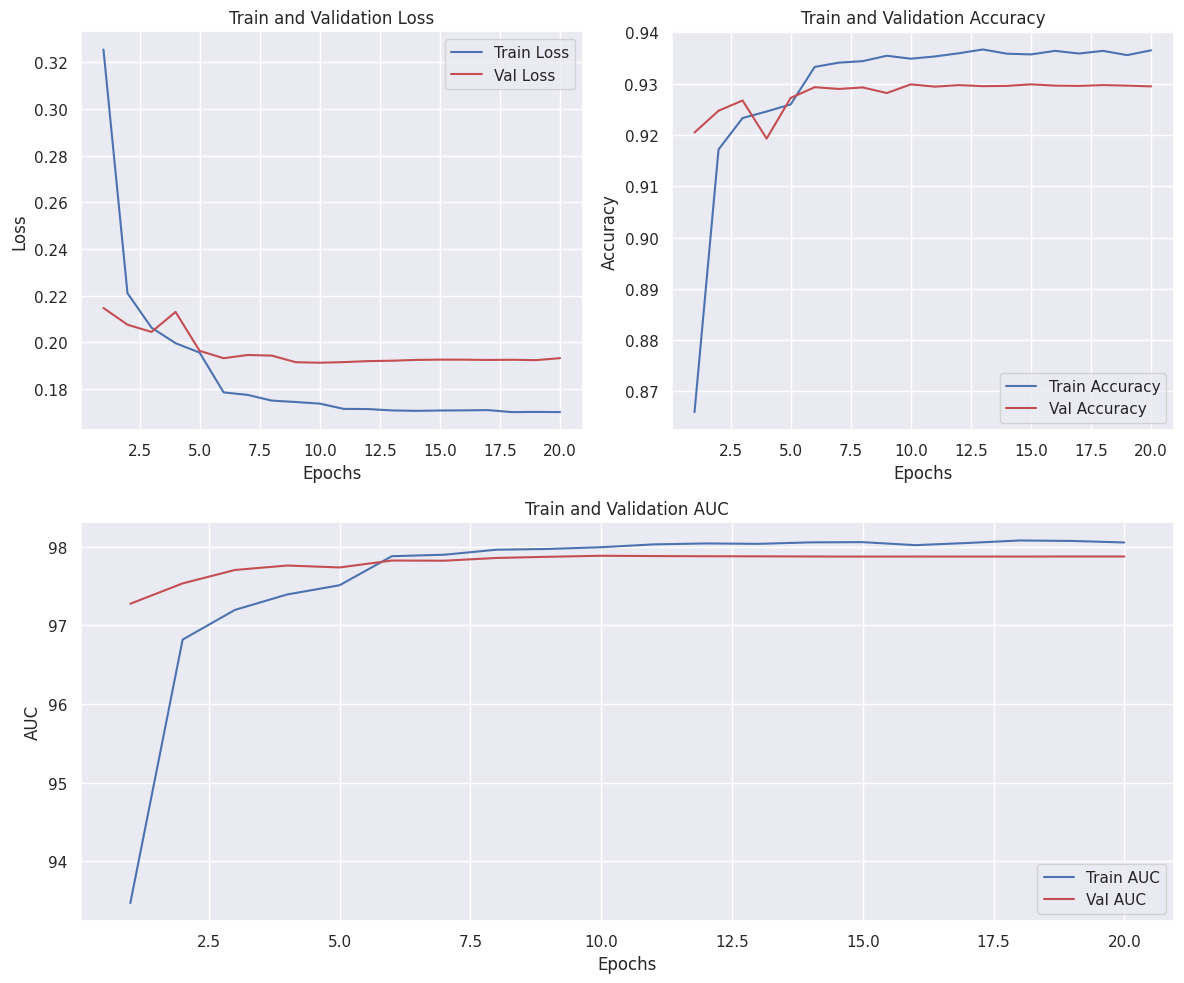

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [9]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "basic",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, i

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 46.75batch/s, Epoch = 28m 31s, Loss = 0.4108|0.3968, Acc = 0.827|0.841, AUC = 89.353|93.217


Epoch 02: 46.74batch/s, Epoch = 28m 31s, Loss = 0.3602|0.3709, Acc = 0.852|0.852, AUC = 91.860|93.435


Epoch 03: 46.95batch/s, Epoch = 28m 23s, Loss = 0.3490|0.3306, Acc = 0.857|0.863, AUC = 92.344|93.759


Epoch 04: 47.35batch/s, Epoch = 28m 9s, Loss = 0.3482|0.3307, Acc = 0.857|0.864, AUC = 92.379|93.850


Epoch 05: 46.45batch/s, Epoch = 28m 42s, Loss = 0.3439|0.3254, Acc = 0.859|0.864, AUC = 92.576|93.906


Epoch 06: 46.95batch/s, Epoch = 28m 23s, Loss = 0.3288|0.3285, Acc = 0.868|0.865, AUC = 93.196|93.911


Epoch 07: 46.85batch/s, Epoch = 28m 27s, Loss = 0.3282|0.3234, Acc = 0.869|0.865, AUC = 93.215|93.980


Epoch 08: 47.08batch/s, Epoch = 28m 19s, Loss = 0.3281|0.3266, Acc = 0.869|0.865, AUC = 93.211|93.969


Epoch 09: 46.80batch/s, Epoch = 28m 29s, Loss = 0.3266|0.3293, Acc = 0.868|0.865, AUC = 93.281|93.965


Epoch 10: 47.20batch/s, Epoch = 28m 15s, Loss = 0.3277|0.3226, Acc = 0.869|0.866, AUC = 93.231|93.994


Epoch 11: 47.16batch/s, Epoch = 28m 16s, Loss = 0.3247|0.3298, Acc = 0.869|0.865, AUC = 93.371|93.969


Epoch 12: 46.88batch/s, Epoch = 28m 26s, Loss = 0.3241|0.3257, Acc = 0.870|0.865, AUC = 93.369|93.988


Epoch 13: 46.90batch/s, Epoch = 28m 25s, Loss = 0.3252|0.3293, Acc = 0.869|0.865, AUC = 93.348|93.964


Epoch 14: 46.80batch/s, Epoch = 28m 29s, Loss = 0.3251|0.3269, Acc = 0.870|0.865, AUC = 93.301|93.973


Epoch 15: 47.27batch/s, Epoch = 28m 12s, Loss = 0.3246|0.3281, Acc = 0.871|0.865, AUC = 93.369|93.982
TOTAL TIME = 25564.45s
BEST ACC = 0.87% AT EPOCH 10
BEST AUC = 93.99 AT EPOCH 10


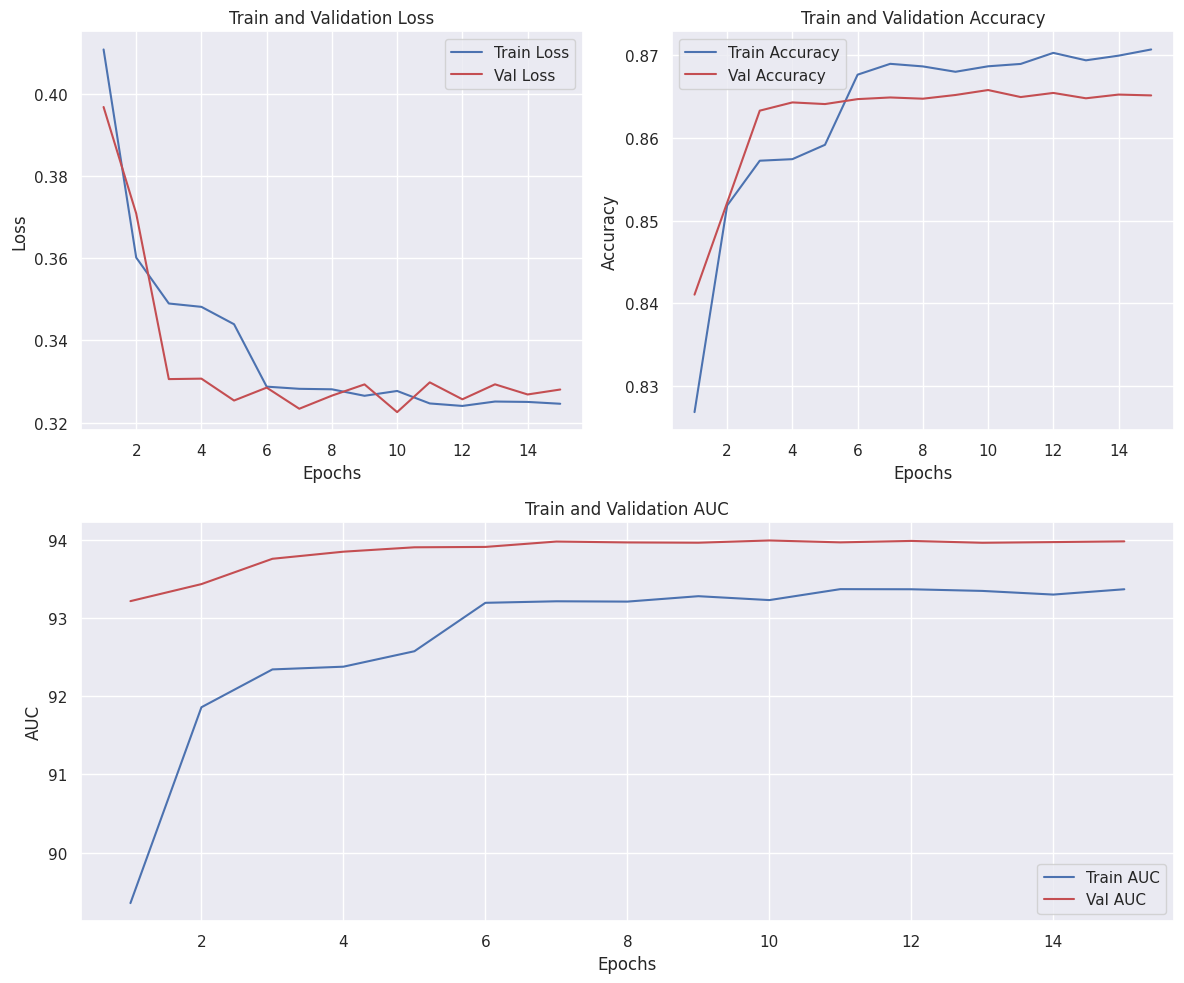

In [10]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [11]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=15,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "hadamard": False,
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "rot": "Z",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
TextClassifier(
  (squeeze): Linear(in_features=768, out_features=8, bias=True)
  (transformers): ModuleList(
    (0-1): 2 x Encoder(
      (attn): MultiHeadedAttention(
        (k_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (q_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (v_linear): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (combine_heads): QuantumLayer(
          (linear): <Quantum Torch Layer: func=qlayer>
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, i

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 31.43batch/s, Epoch = 42m 25s, Loss = 0.4092|0.3302, Acc = 0.822|0.861, AUC = 89.449|93.459


Epoch 02: 31.38batch/s, Epoch = 42m 29s, Loss = 0.3625|0.3259, Acc = 0.852|0.864, AUC = 91.748|93.756


Epoch 03: 31.58batch/s, Epoch = 42m 13s, Loss = 0.3505|0.3309, Acc = 0.856|0.865, AUC = 92.351|93.805


Epoch 04: 31.51batch/s, Epoch = 42m 18s, Loss = 0.3474|0.3852, Acc = 0.857|0.839, AUC = 92.464|93.728


Epoch 05: 31.77batch/s, Epoch = 41m 58s, Loss = 0.3440|0.3354, Acc = 0.858|0.860, AUC = 92.625|93.887


Epoch 06: 31.72batch/s, Epoch = 42m 1s, Loss = 0.3294|0.3300, Acc = 0.867|0.864, AUC = 93.204|93.903


Epoch 07: 31.50batch/s, Epoch = 42m 19s, Loss = 0.3287|0.3236, Acc = 0.867|0.865, AUC = 93.236|93.942


Epoch 08: 31.67batch/s, Epoch = 42m 6s, Loss = 0.3280|0.3257, Acc = 0.867|0.866, AUC = 93.277|93.948


Epoch 09: 31.77batch/s, Epoch = 41m 58s, Loss = 0.3268|0.3250, Acc = 0.868|0.865, AUC = 93.314|93.958


Epoch 10: 31.54batch/s, Epoch = 42m 16s, Loss = 0.3258|0.3333, Acc = 0.868|0.862, AUC = 93.351|93.940


Epoch 11: 31.74batch/s, Epoch = 42m 0s, Loss = 0.3257|0.3272, Acc = 0.869|0.866, AUC = 93.366|93.959


Epoch 12: 31.65batch/s, Epoch = 42m 7s, Loss = 0.3235|0.3266, Acc = 0.869|0.866, AUC = 93.435|93.963


Epoch 13: 31.74batch/s, Epoch = 42m 0s, Loss = 0.3244|0.3270, Acc = 0.870|0.866, AUC = 93.418|93.960


Epoch 14: 31.75batch/s, Epoch = 41m 59s, Loss = 0.3230|0.3265, Acc = 0.869|0.866, AUC = 93.483|93.969


Epoch 15: 31.71batch/s, Epoch = 42m 3s, Loss = 0.3238|0.3258, Acc = 0.869|0.865, AUC = 93.427|93.965
TOTAL TIME = 37937.60s
BEST ACC = 0.87% AT EPOCH 12
BEST AUC = 93.97 AT EPOCH 14


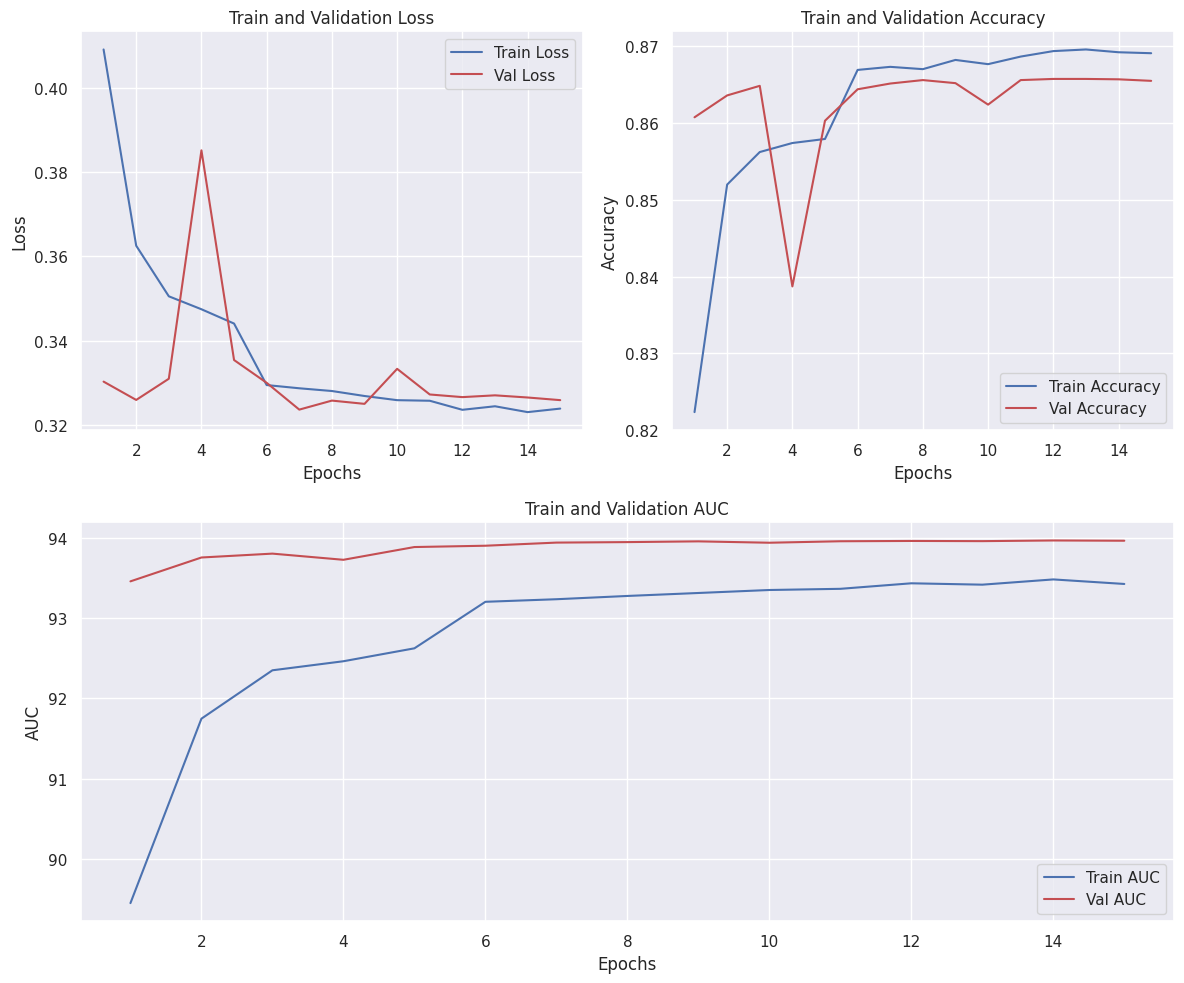

In [12]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)